<span style="color: blue;">
<br><br><br>
<h1><center>Sentiment Analysis and Predicting Share Price</center></h1>
<h2><center>An Analysis of headlines and the Disney Share Price<br>What is the best predictive model?</center></h2>
<br><br>
<h3><center>A Report by Cathal O'Donghaile<h3></center>
<br><br><br>
</span>

<span style="color: blue;">
<h1><left> Table of contents<h1><left>
</span>

<span style="color: red;">

<h3><left>Introduction
<br><br>
Data Preparation

Sentiment Analysis

Disney Shares

Predictions

Conclusion

References</h3></left>
<br><br>
</span>

<span style="color: blue;">
<br><br>   
<h1><center>Introduction</center></h1>
<br><br>
</span>

This is a two part report which analyses sentiment based on a dataset of abc news headlines spanning 2003 up to 2021 and a prediction of how Disney shares will perform based on actual closing share prices over a period of 5 years.

In [1]:
# import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.stem import PorterStemmer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import yfinance as yf
import matplotlib.ticker as ticker
from sklearn.ensemble import RandomForestRegressor
abcnewstext_df=pd.read_csv("abcnews-date-text.csv") #import the news text dataset into a dataframe
abcnewstext_df.info()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\donne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\donne\anaconda3\lib\site-packages\h5py\__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


We’ll start with the sentiment analysis. The dataset is ABC News Headlines over the space of 17 years containing the date and the headline. We’ll do a sentiment analysis on it which will produce 1 of three results: positive, negative and neutral. It does so by applying a lexicon to each word in the headline, applying a score and then categorising the word as a sentiment. Firstly, let’s import the libraries and dataset and see what’s in the dataset.
The dataset has over 1.2 million rows and 2 columns – the date and the headline. It is a good sample to perform an anaylsis on. We can now do some data preparation.

<span style="color: blue;">
<br><br>   
<h1><center>Data Preparation</center></h1>
<br><br>
</span>

Let's see if there are null values.

In [2]:
abcnewstext_df.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

There are none. Let’s have a look at the first 20 values. 

In [3]:
abcnewstext_df.head(20)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


They are very typical headlines that you would find on a news outlet. So, I’m looking for predominance of stop words like “and”, “the”, “or” etc. Being headlines, they have very few stop words. As a result, I’m not doing any tokenisation or stemming of the data because it doesn’t appear to be necessary. I’ll run the sentiment analysis on the raw data.

<span style="color: blue;">
<br><br>   
<h1><center>Sentiment Analysis</center></h1>
<br><br>
</span>

In [4]:
sentiment = SentimentIntensityAnalyzer()
abcnewstext_df['sentiment'] = abcnewstext_df['headline_text'].apply(lambda review: sentiment.polarity_scores(review))
abcnewstext_df['compound']  = abcnewstext_df['sentiment'].apply(lambda score_dict: score_dict['compound'])
abcnewstext_df.head()

,publish_date,headline_text,sentiment,compound
0,20030219,aba decides against community broadcasting lic...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,20030219,act fire witnesses must be aware of defamation,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.3400
2,20030219,a g calls for infrastructure protection summit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,20030219,air nz staff in aust strike for pay rise,"{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp...",-0.2263
4,20030219,air nz strike to affect australian travellers,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.1280


The extra column reveals a breakdown of negative, neutral and positive scores and produces a compound score. The compound score is what I am interested in. I’ll now add a further column that assigns the following outputs: Negative compound score: negative. Zero compound score: neutral. Positive compound score: Positive. Once we have this, we can graph them.

In [5]:
abcnewstext_df['comp_score'] = ''
abcnewstext_df.loc[(abcnewstext_df['compound']==0),'comp_score']='neutral'
abcnewstext_df.loc[(abcnewstext_df['compound']>0),'comp_score']='positive'
abcnewstext_df.loc[(abcnewstext_df['compound']<0),'comp_score']='negative'
sentiment_totals=abcnewstext_df['comp_score'].value_counts()
#sentiment_totals.plot(kind="pie",title="Sentiment Analyser");
abcnewstext_df.head(50)

,publish_date,headline_text,sentiment,compound,comp_score
0,20030219,aba decides against community broadcasting lic...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,20030219,act fire witnesses must be aware of defamation,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.3400,negative
2,20030219,a g calls for infrastructure protection summit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,20030219,air nz staff in aust strike for pay rise,"{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp...",-0.2263,negative
4,20030219,air nz strike to affect australian travellers,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.1280,negative
5,20030219,ambitious olsson wins triple jump,"{'neg': 0.0, 'neu': 0.306, 'pos': 0.694, 'comp...",0.7783,positive
6,20030219,antic delighted with record breaking barca,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106,positive
7,20030219,aussie qualifier stosur wastes four memphis match,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
8,20030219,aust addresses un security council over iraq,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.3400,positive
9,20030219,australia is locked into war timetable opp,"{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...",-0.5994,negative


There was really only two choices to visualise this result – bar or pie chart. Each have advantages. Pie charts are good for visualising breakdowns in that each portion is presented graphically, but are expressed in percentages rather than in actual totals. Bar charts are ideal for this, but you would run this on a total of values rather than each individual one’s. Scatter graphs are not appropriate for this as the only columns available are sentiment and publish_date.

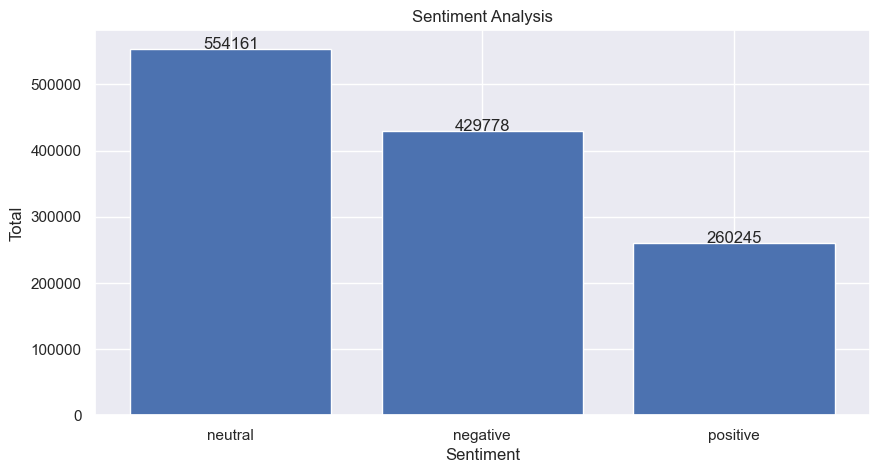

In [6]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')   
    
plt.figure(figsize = (10, 5))
x=abcnewstext_df['comp_score'].unique()
y=abcnewstext_df['comp_score'].value_counts()

plt.bar(x,y)
addlabels(x,y)
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Total")

plt.show()

So, the highest proportion of headlines are flagged as neutral, occupying 44.5% of the results. The remaining 55.5% is broken down between negative and positive. 

<span style="color: blue;">
<br><br>   
<h1><center>Disney Shares</center></h1>
<br><br>
</span>

Now let’s analyse Disney shares over the past 5 years. We can utilise several datasets for this that have stock exchange data in them, but one that stands out is Yahoo Finance Data which is constantly updated with new information and has shares from a multitude of stock exchanges around the world. When querying this data, we can give it parameters of a start and end date. In the absence of these, it queries the entire dataset. As the question asks for data from the last 5 years, I will calculate the start date based on the current date minus 365 multiplied by 5. In effect, it will utilise up to date information. 

In [7]:
dis=yf.Ticker("DIS")
start_date=(datetime.today() - timedelta(days=(365*5)))
disney_shares=dis.history('DIS',start=start_date)
disney_shares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2018-07-05 00:00:00-04:00 to 2023-06-30 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1256 non-null   float64
 1   High          1256 non-null   float64
 2   Low           1256 non-null   float64
 3   Close         1256 non-null   float64
 4   Volume        1256 non-null   int64  
 5   Dividends     1256 non-null   float64
 6   Stock Splits  1256 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.5 KB


In [8]:
disney_shares.tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-02 00:00:00-04:00,89.629997,91.339996,89.599998,90.769997,14330500,0.0,0.0
2023-06-05 00:00:00-04:00,91.199997,91.760002,89.440002,91.000000,18506700,0.0,0.0
2023-06-06 00:00:00-04:00,91.099998,92.510002,91.019997,92.160004,12109100,0.0,0.0
2023-06-07 00:00:00-04:00,92.779999,93.080002,91.860001,92.519997,11082400,0.0,0.0
2023-06-08 00:00:00-04:00,92.519997,92.680000,91.300003,92.529999,9030200,0.0,0.0
2023-06-09 00:00:00-04:00,92.779999,92.919998,91.550003,91.930000,9625400,0.0,0.0
2023-06-12 00:00:00-04:00,92.250000,93.230003,91.769997,93.139999,12341600,0.0,0.0
2023-06-13 00:00:00-04:00,94.120003,94.440002,93.440002,93.849998,12964400,0.0,0.0
2023-06-14 00:00:00-04:00,94.260002,94.519997,91.919998,92.449997,15877400,0.0,0.0


Looking at the tail end of the result, I can see the last entry is the previous working day to today. Now let’s start with regression testing. There are several algorithms available to me for doing regression from simple ones like Decision Tree all the way up to complicated and very precise ones like Recurrent Neural Network (RNN). I'll compare the RNN result to a result coming from Random Forest Regressor. Firstly, let’s just plot the data and examine the result.

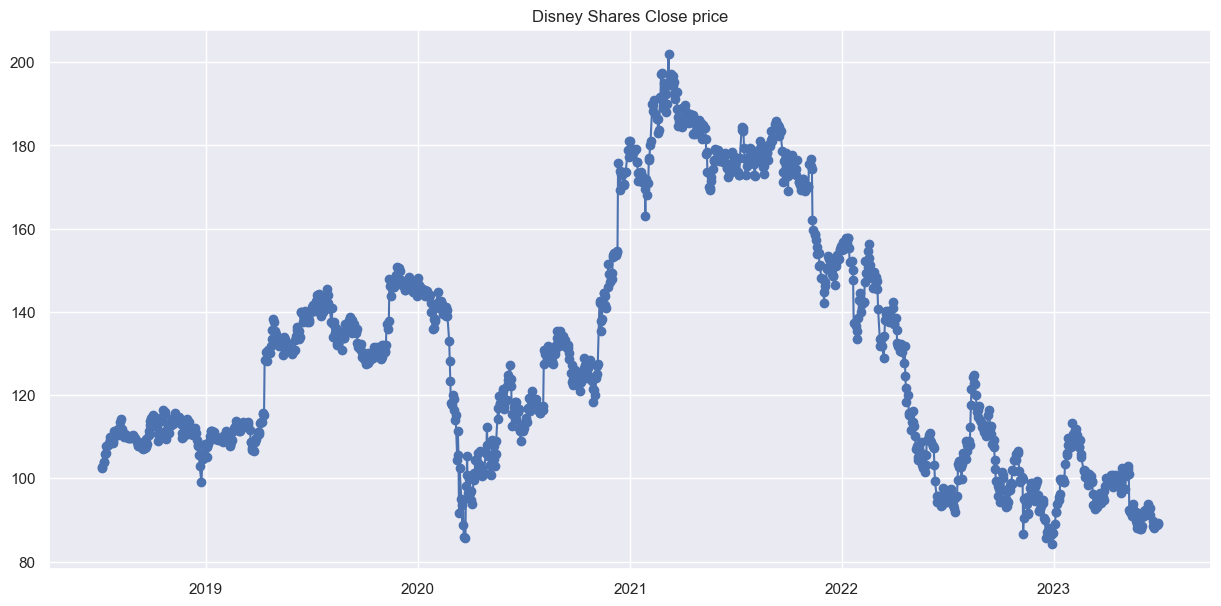

In [9]:
def plot_timeseries_df(df, attrib, title='Timeseries'):
    fig = plt.figure(figsize=(15,7))
    plt.plot(df[attrib], 'o-')
    plt.title(title)
    plt.show()
plot_timeseries_df(disney_shares, "Close", title="Disney Shares Close price")

In [10]:
high_close_price=disney_shares['Close'].max()
low_close_price=disney_shares['Close'].min()
print("The highest closing price was $", high_close_price)
print("The lowest closing price was $", low_close_price)

The highest closing price was $ 201.91000366210938
The lowest closing price was $ 84.16999816894531


As we can see, the price of the shares fluctuated quite a bit in the last 5 years, reaching a peak of $201.91 in 2021 after a steady rise since 2019. This can be attributed to a number of factors including the launch of the Disney+ streaming service (Walt Disney Company, 2019) and also Disney producing what is now the most successful movie of all time, Avengers Endgame (BBC Entertainment and Arts, 2019). However, it has gone down since then. With such large fluctuations in price, predicting share values will be a challenge.

<span style="color: blue;">
<br><br>   
<h1><center>Predictions</center></h1>
<br><br>
</span>

RNN is particularly useful for something like share price prediction as it can utilise very large portions of the dataset and it has several steps to it before it produces a result. There are two basic parameters for the analyser to put in – number of Epochs and number of time steps. Changing these can have a direct effect on the result. If the number of Epochs is low, it creates a smooth output rather than one that follows the pattern. Making it high results in the code taking an inordinately long time to run with little difference in the accuracy of the result. As a mid point, I ran it on 150 Epochs and 40 time units. We’re looking for it to predict the share price for the last month based on what happened before. 



In [11]:
scaler = MinMaxScaler()
training_data = disney_shares.iloc[:, 3].values
training_data = scaler.fit_transform(training_data.reshape(-1, 1))
x_training_data = []
y_training_data =[]
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)
print(x_training_data.shape)
print(y_training_data.shape)

(1216, 40)
(1216,)


In [12]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 

                                               x_training_data.shape[1], 

                                               1))
print(x_training_data.shape)

(1216, 40, 1)


In [13]:
rnn = Sequential()
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))

rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn.fit(x_training_data, y_training_data, epochs = 150, batch_size = 32)

Epoch 1/150
38/38 [==============================] - 22s 131ms/step - loss: 0.0393
Epoch 2/150
38/38 [==============================] - 5s 131ms/step - loss: 0.0079
Epoch 3/150
38/38 [==============================] - 5s 127ms/step - loss: 0.0072
Epoch 4/150
38/38 [==============================] - 5s 130ms/step - loss: 0.0074
Epoch 5/150
38/38 [==============================] - 5s 130ms/step - loss: 0.0059
Epoch 6/150
38/38 [==============================] - 5s 139ms/step - loss: 0.0059
Epoch 7/150
38/38 [==============================] - 5s 133ms/step - loss: 0.0061
Epoch 8/150
38/38 [==============================] - 5s 126ms/step - loss: 0.0050
Epoch 9/150
38/38 [==============================] - 5s 134ms/step - loss: 0.0050
Epoch 10/150
38/38 [==============================] - 5s 136ms/step - loss: 0.0047
Epoch 11/150
38/38 [==============================] - 5s 126ms/step - loss: 0.0048
Epoch 12/150
38/38 [==============================] - 5s 131ms/step - loss: 0.0051
Epoch 13/150

38/38 [==============================] - 3s 89ms/step - loss: 0.0016
Epoch 100/150
38/38 [==============================] - 3s 88ms/step - loss: 0.0014
Epoch 101/150
38/38 [==============================] - 4s 100ms/step - loss: 0.0013
Epoch 102/150
38/38 [==============================] - 4s 101ms/step - loss: 0.0013
Epoch 103/150
38/38 [==============================] - 4s 93ms/step - loss: 0.0013
Epoch 104/150
38/38 [==============================] - 4s 95ms/step - loss: 0.0016
Epoch 105/150
38/38 [==============================] - 4s 93ms/step - loss: 0.0014
Epoch 106/150
38/38 [==============================] - 3s 90ms/step - loss: 0.0014
Epoch 107/150
38/38 [==============================] - 4s 97ms/step - loss: 0.0015
Epoch 108/150
38/38 [==============================] - 4s 96ms/step - loss: 0.0014
Epoch 109/150
38/38 [==============================] - 4s 95ms/step - loss: 0.0014
Epoch 110/150
38/38 [==============================] - 4s 93ms/step - loss: 0.0014
Epoch 111/150
38

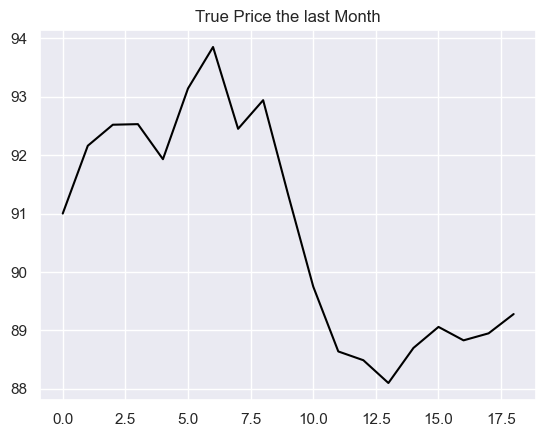

In [14]:
start_time=(datetime.today() - timedelta(days=30))
disney_shares_test_data=dis.history(start=start_time)
test_data = disney_shares_test_data.iloc[:, 3].values
plt.plot(test_data, color='black');
plt.title('True Price the last Month');

In [15]:
unscaled_training_data =disney_shares
unscaled_test_data = disney_shares_test_data
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values
len(x_test_data)
x_test_data = np.reshape(x_test_data, (-1, 1))
x_test_data = scaler.transform(x_test_data)
final_x_test_data = []

for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))
predictions = rnn.predict(final_x_test_data)
unscaled_predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 3s 3s/step


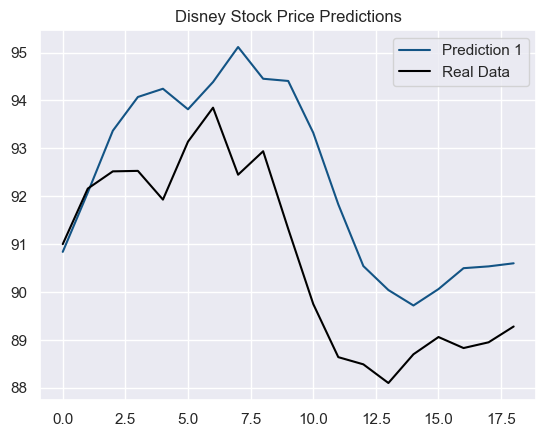

In [16]:
plt.plot(unscaled_predictions, color = '#135485', label = "Prediction 1")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Disney Stock Price Predictions')

plt.legend()

As we can see, it predicts both the value and the pattern quite accurately. In order to show how accurate this is, I will compare this result to a much more simple algorithm that is not based on LTSM but rather on Decision Tree.

Firstly, let’s split up the testing and the training data. The testing data remains the same from the last analysis – 30 days from the current date. For the training data, we need to make a change. The training dataset needs to be of the same size as the testing data. One of the characteristics of the dataset is that the entries on it coincide with stock exchange working days which are largely Monday-Friday with breaks where the stock exchange is closed. In a 30 day period, there can be anything between 20-23 Stock Exchange working days. So, in order to provide an accurate training sample, I’ll pick a 37 day period and tell the algorithm to select the same number of datapoints as the test data has. As a result, we won’t need to change the scanning dates in the code.


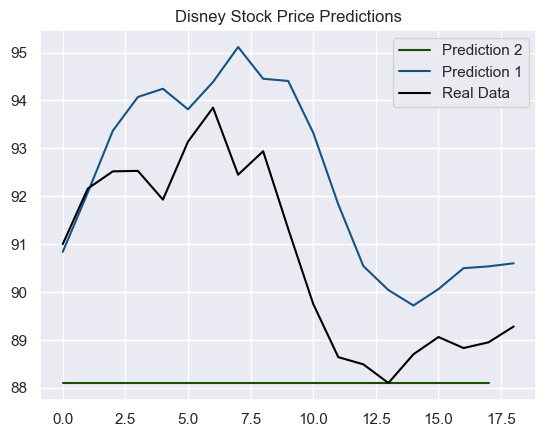

In [17]:
no_of_counts=len(test_data)
training=dis.history(start='2023-03-25', end='2023-05-01')
testing=test_data
X_train, X_test, y_train, y_test = train_test_split(training[:no_of_counts], testing, test_size=0.9, random_state=60) 
regressor = RandomForestRegressor(n_estimators=300, max_depth=27)
clf=regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
y_pred=pd.DataFrame(y_pred)

plt.plot(y_pred, color = '#135000', label = "Prediction 2")
plt.plot(unscaled_predictions, color = '#135485', label = "Prediction 1")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Disney Stock Price Predictions')

plt.legend()

As we can see, the result it produces doesn’t come anywhere near the accuracy of the LTSM based algorithm. 

<span style="color: blue;">
<br><br>   
<h1><center>Conclusion</center></h1>
<br><br>
</span>

If we take a step and look at the results of both the sentiment analysis and the stock price prediction and view from the outside, taking into account our own knowledge of these areas. Firstly, is the sentiment analysis really that accurate? The nature of headlines is that they are designed to grab the viewers attention being either very positive or very negative depending on the nature of the story. A neutral headline would not grab people’s attention.

Taking a look at a sample of 50 of the sentiment analysis results and see does the result match with my own interpretation of the headline. In the sample, 13 of the results are flagged as neutral. Of them, I would classify only 4 of them as being actually neutral with the remaining being a mixture of positive and negative. One such example is the headline “dog mauls 18 month old toddler in nsw” from February 19th, 2003. The analysis flags this one as neutral whereas in reality it is quite negative. It would be safe to say in the entire analysis, a human view of positive/negative/neutral sentiment would produce a very different result.

We can take a similar approach to predicting share prices. There is an expression associated with predicting share prices: “Past Performance Is Not Indicative Of Future Results.” (Brown, 2016) This is because share prices are affected by a multitude of factors from company specific ones like a drop in income as well as more macro factors like the economy in the country in which the company is headquartered and also fluctuations in earnings for the industry in which the company operates. 

In Disney’s case, their share price is influenced by several factors notably the current writers strike which is impacting on their release schedule in the coming years (D'Alessandro, 2023); their acquisition of Marvel Studios (KAUFMAN, 2022) which increased their earnings and also the launch of the Disney+ streaming service and a drop in subscribers on the same service. 
While the algorithm appeared to produce an accurate result, would it be as accurate as predicting the future performance of the share? Only time will tell. 

(1358 Words)


<span style="color: blue;">
<br><br>   
<h1><center>References</center></h1>
<br><br>
</span>

BBC Entertainment and Arts, 2019. Avengers: Endgame overtakes Avatar as top box office movie of all time. [Online] 
Available at: https://www.bbc.com/news/entertainment-arts-49069432
[Accessed 1 July 2023].

Brown, J., 2016. Past Performance Is Not Indicative Of Future Results. [Online] 
Available at: https://www.forbes.com/sites/johnbrown/2016/09/29/past-performance-is-not-indicative-of-future-results/
[Accessed 1 July 2023].

D'Alessandro, A., 2023. Disney Moves Movies Due To WGA Strike. [Online] 
Available at: https://deadline.com/2023/06/disney-marvel-wga-strike-thunderbolts-blade-avengers-kang-dynasty-1235415782/
[Accessed 1 July 2023].

KAUFMAN, A., 2022. When did Disney buy Marvel and for how much? The historic deal explained.. [Online] 
Available at: https://eu.usatoday.com/story/entertainment/2022/07/28/when-did-disney-buy-marvel/10147483002/
[Accessed 1 July 2023].

Walt Disney Company, 2019. Disney+ Launches Today—and a New Era of Disney Entertainment Begins. [Online] 
Available at: https://thewaltdisneycompany.com/disney-launches-today-and-a-new-era-of-disney-entertainment-begins/
[Accessed 1 July 2023].

